In [33]:

from pathlib import Path

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


dataset_path = Path().resolve() / "datasets"
# get the full path
print(f"Dataset path: {dataset_path}")

from datasets.cbecs.lookups import lookup_pba

# auto reload any changes in the module
%load_ext autoreload

Dataset path: /Users/nlong/working/comstock/pull-comstock-data/datasets
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [34]:
# read in the xlsx spreadsheet sheet called cbecs2018_final_public

cbecs2018 = pd.read_excel(dataset_path / "cbecs" / "cbecs2018_final_public.xlsx", sheet_name="cbecs2018_final_public")


In [36]:
display(cbecs2018)


,PUBID,REGION,CENDIV,PBA,PUBCLIM,SQFT,SQFTC,WLCNS,RFCNS,RFCOOL,...,ZMFBTU,ZMFEXP,ZELCNS,ZELEXP,ZNGCNS,ZNGEXP,ZFKCNS,ZFKEXP,ZDHBTU,ZDHEXP
0,1,3,5,2,3,210000,8,1,4,2,...,0,0,0,0,9,9,1,1,0,0
1,2,4,9,2,4,28000,5,1,6,1,...,0,0,0,0,0,0,9,9,9,9
2,3,3,5,8,4,2100,2,1,4,2,...,0,0,0,0,9,9,9,9,9,9
3,4,3,7,5,5,240000,8,2,6,1,...,0,0,0,0,1,1,9,9,9,9
4,5,1,2,5,3,295000,8,3,6,2,...,0,0,0,0,0,0,9,9,9,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6431,6432,4,8,14,2,130000,7,1,1,2,...,0,0,0,0,0,0,9,9,9,9
6432,6433,3,7,1,4,1050,2,1,5,2,...,9,9,9,9,9,9,9,9,9,9
6433,6434,3,5,2,4,122000,7,2,6,1,...,1,1,1,1,9,9,9,9,9,9
6434,6435,3,5,23,4,15000,4,3,5,1,...,2,2,2,2,2,2,9,9,9,9


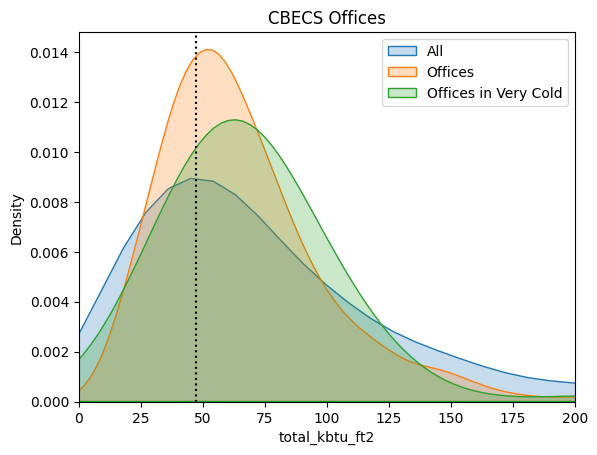

In [37]:
# calculate the total kbtu/ft2 for each building
cbecs2018["total_kbtu_ft2"] = cbecs2018["MFBTU"] / cbecs2018["SQFT"]


# create the kde plot of all kbtu/ft2 
sns.kdeplot(cbecs2018["total_kbtu_ft2"], fill=True)

# filter only offices
offices = cbecs2018[cbecs2018["PBA"] == 2]
sns.kdeplot(offices["total_kbtu_ft2"], fill=True)

# only offices in very cold
offices_very_cold = offices[offices["PUBCLIM"] == 1]
sns.kdeplot(offices_very_cold["total_kbtu_ft2"], fill=True)
# add legend
plt.legend(["All", "Offices", "Offices in Very Cold"])
plt.xlim(0,200)
plt.title("CBECS Offices")


# 1st quartile of the offices_very_cold
offices_very_cold_1st_quartile = offices_very_cold["total_kbtu_ft2"].quantile(0.25)
# plot as line
plt.axvline(offices_very_cold_1st_quartile, color="black", linestyle=":")
